## Principles and Applications of Data Science
## Spring 2021
## Homework 2
## Due Date: Jun 16, 2021

### Name: 張維俊
### Student ID Number: 106590054

### Reading files, including all data files and a table file for for mapping station name to station ID ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob,os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read all csv file in HW2_data floder
path="HW2_data"
file2017=glob.glob(os.path.join(path,"2017*.csv"))
file2018=glob.glob(os.path.join(path,"2018*.csv"))
df2017 = []
df2018 = []
for i in file2017:
    df2017.append(pd.read_csv(i,names=['date', 'hour', 'enter', 'exit','num']))
for i in file2018:
    df2018.append(pd.read_csv(i,names=['date', 'hour', 'enter', 'exit','num']))

In [3]:
#read txt file and build StationID dictionary
txt=pd.read_table(path + '/Station ID.txt', header=None)
StationDict = {}
for i in range(len(txt)):
    StationDict.update({txt[1][i]:txt[0][i]})

In [4]:
#delete redundant data
for i in range(len(df2017)):
    df2017[i] = df2017[i][df2017[i].date<'2018']
    df2018[i] = df2018[i][df2018[i].date<'2019']

In [5]:
#sum up the number of passengers in each station
df2017In = []
df2017Out = []
df2018In = []
df2018Out = []
aggregation_functions_in = {'num': 'sum','enter':'first'}
aggregation_functions_out = {'num': 'sum','exit':'first'}
for i in range(len(df2017)):
    df2017In.append(df2017[i].groupby(df2017[i].enter).aggregate(aggregation_functions_in).sort_values(by=['num'],ascending=False))
    df2017Out.append(df2017[i].groupby(df2017[i].exit).aggregate(aggregation_functions_out).sort_values(by=['num'],ascending=False))
    df2018In.append(df2018[i].groupby(df2018[i].enter).aggregate(aggregation_functions_in).sort_values(by=['num'],ascending=False))
    df2018Out.append(df2018[i].groupby(df2018[i].exit).aggregate(aggregation_functions_out).sort_values(by=['num'],ascending=False))

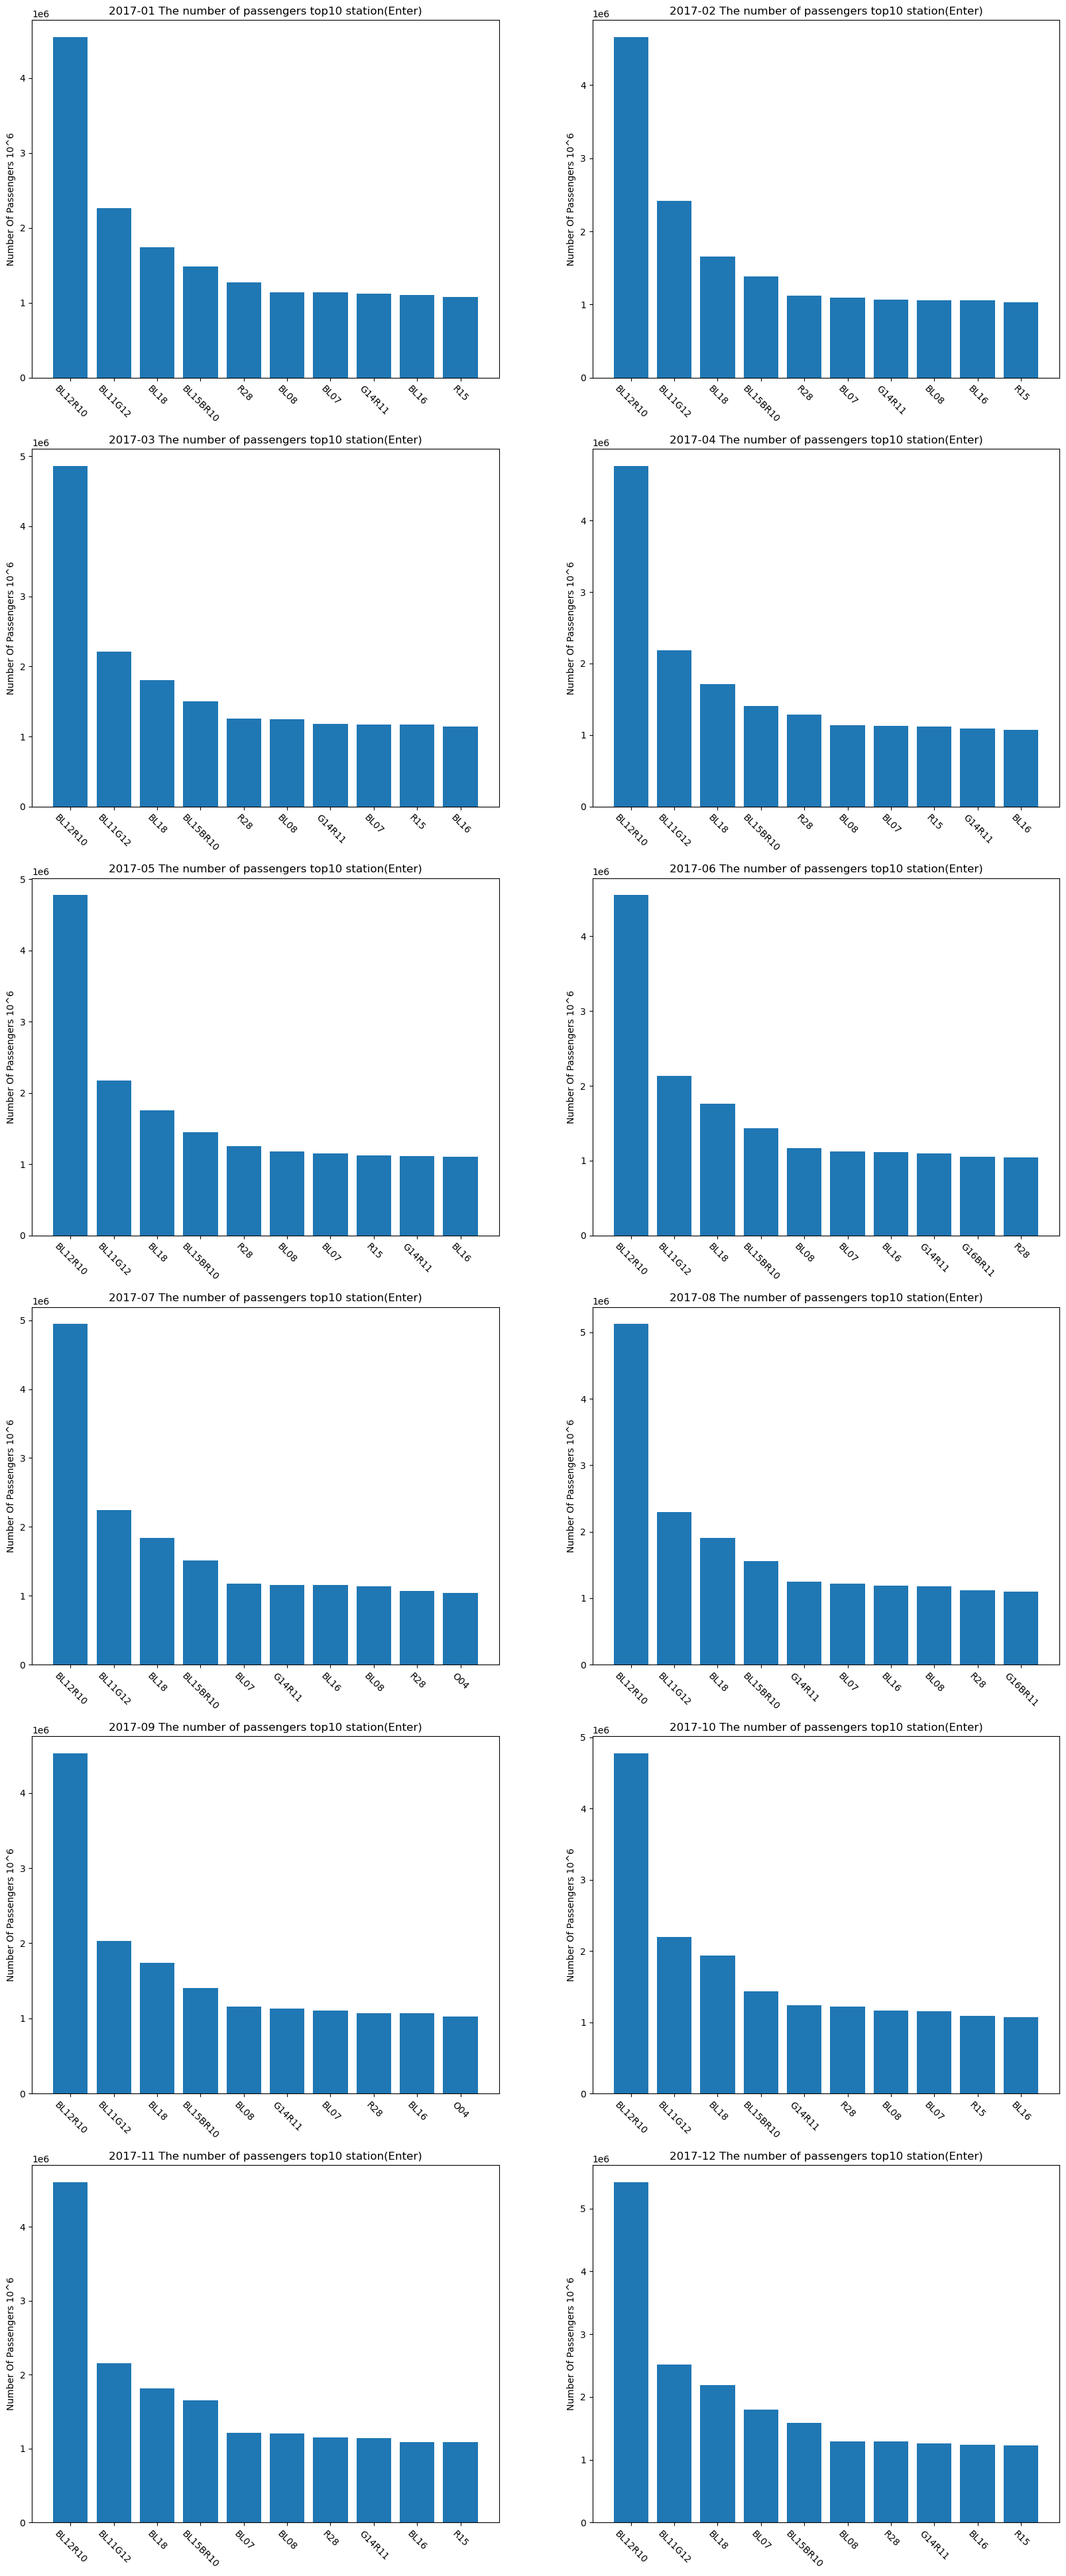

In [6]:
#plot the number of passengers top10 station(Enter) chart for 2017
figure,axes =plt.subplots(6,2,figsize=(20,50),dpi=100)
n=0
for i in df2017In:
    j = int(n/2)
    k = n%2
    axes[j][k].set_ylabel('Number Of Passengers 10^6')
    axes[j][k].set_title('2017-'+str(n+1).zfill(2)+' The number of passengers top10 station(Enter)')
    axes[j][k].bar(i.head(10).enter.map(StationDict),i.head(10).num)
    axes[j][k].set_xticklabels(i.head(10).enter.map(StationDict),rotation=-45)
    n+=1

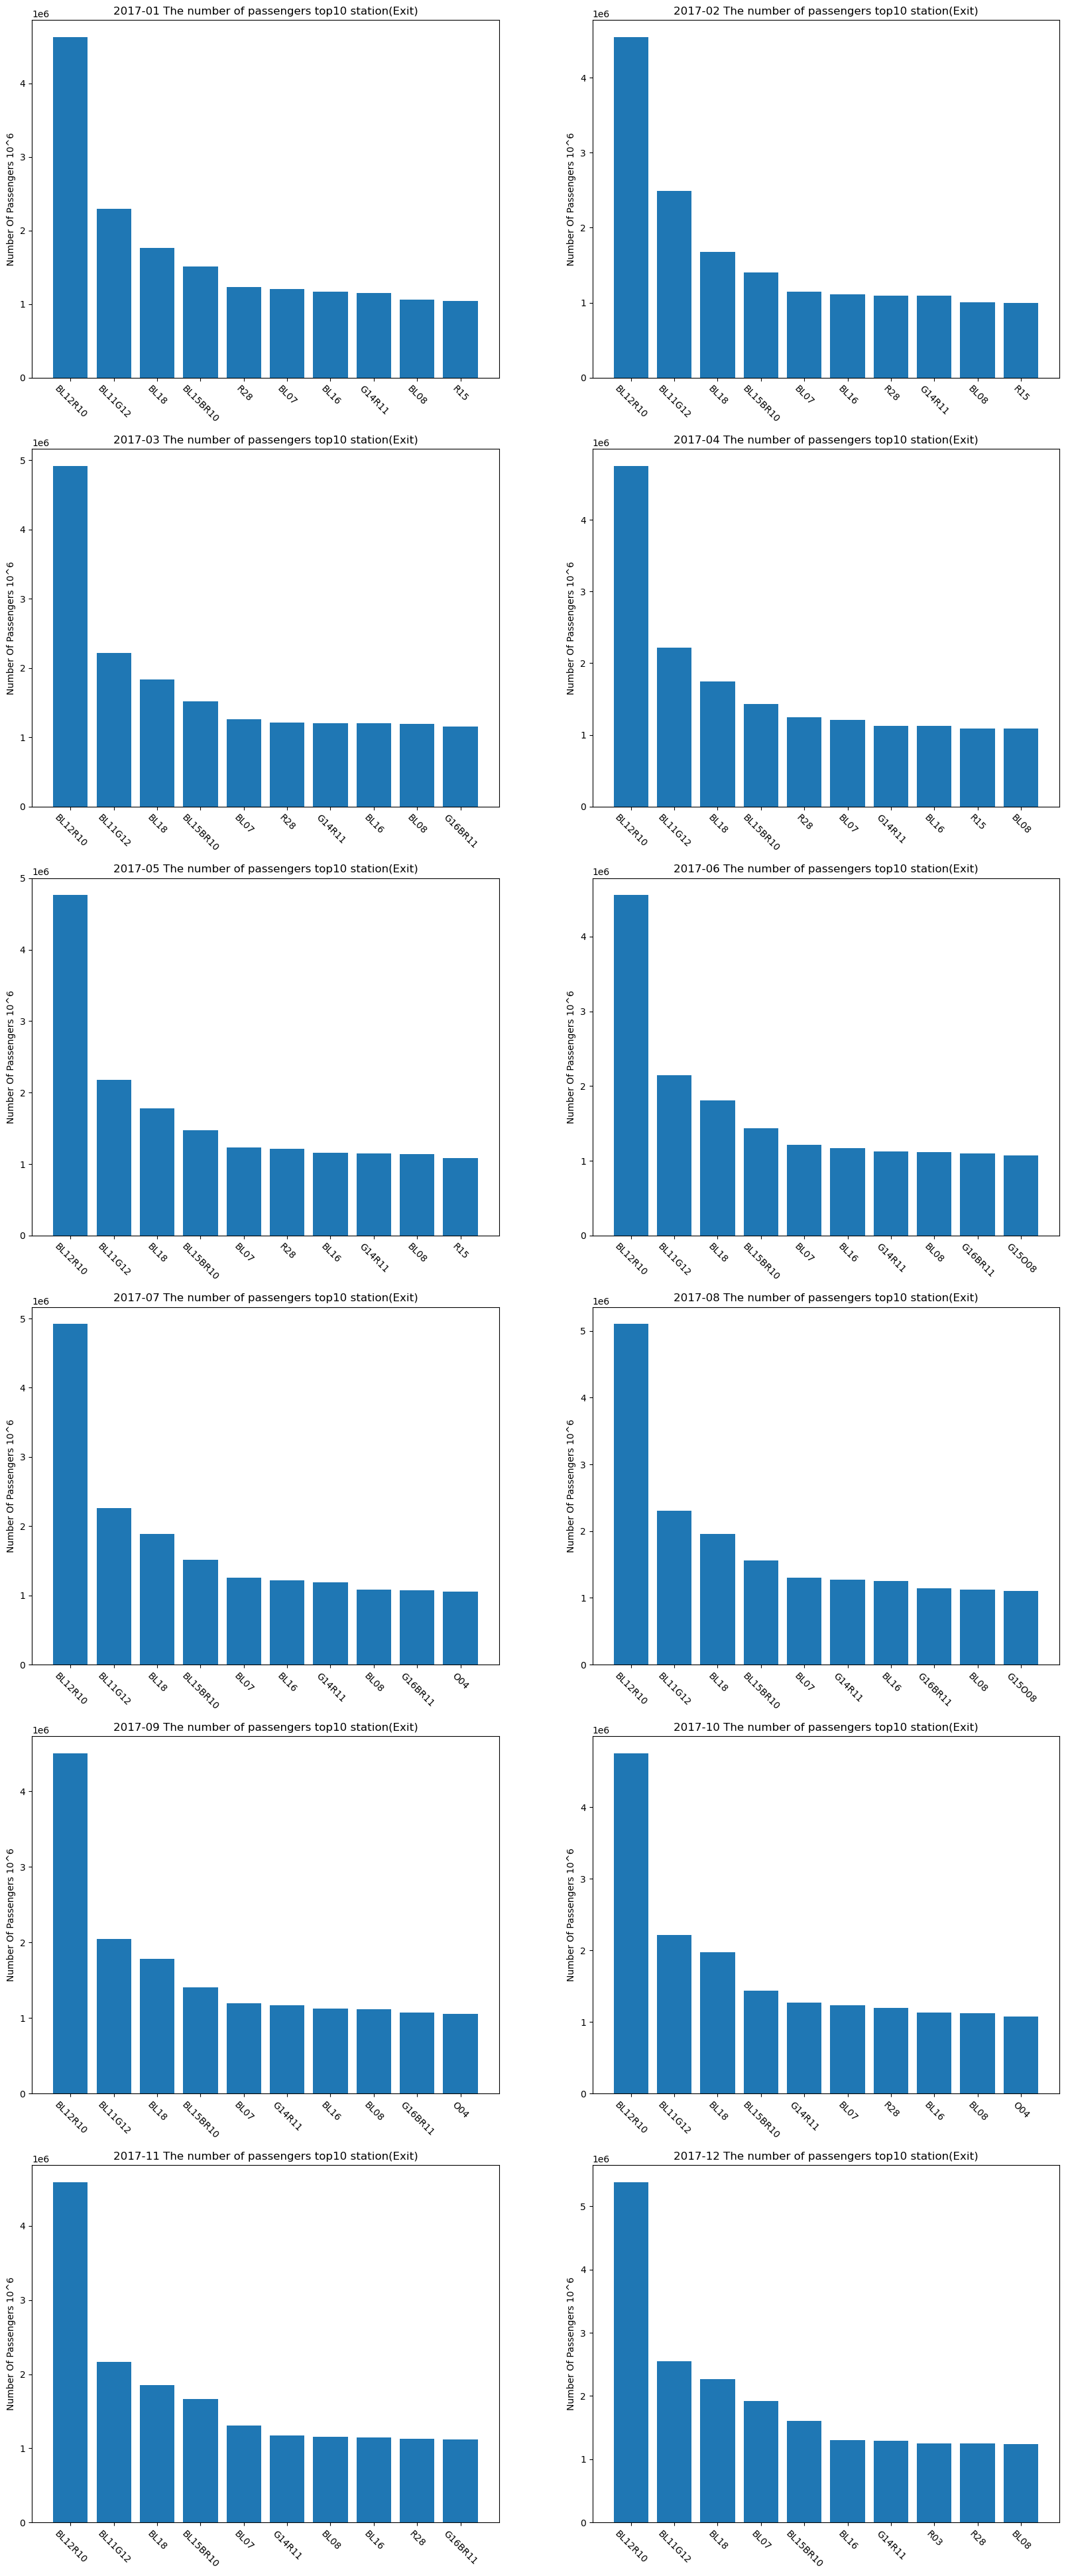

In [7]:
#plot the number of passengers top10 station(Exit) chart for 2017
figure,axes =plt.subplots(6,2,figsize=(20,50),dpi=100)
n=0
for i in df2017Out:
    j = int(n/2)
    k = n%2
    axes[j][k].set_ylabel('Number Of Passengers 10^6')
    axes[j][k].set_title('2017-'+str(n+1).zfill(2)+' The number of passengers top10 station(Exit)')
    axes[j][k].bar(i.head(10).exit.map(StationDict),i.head(10).num)
    axes[j][k].set_xticklabels(i.head(10).exit.map(StationDict),rotation=-45)
    n+=1

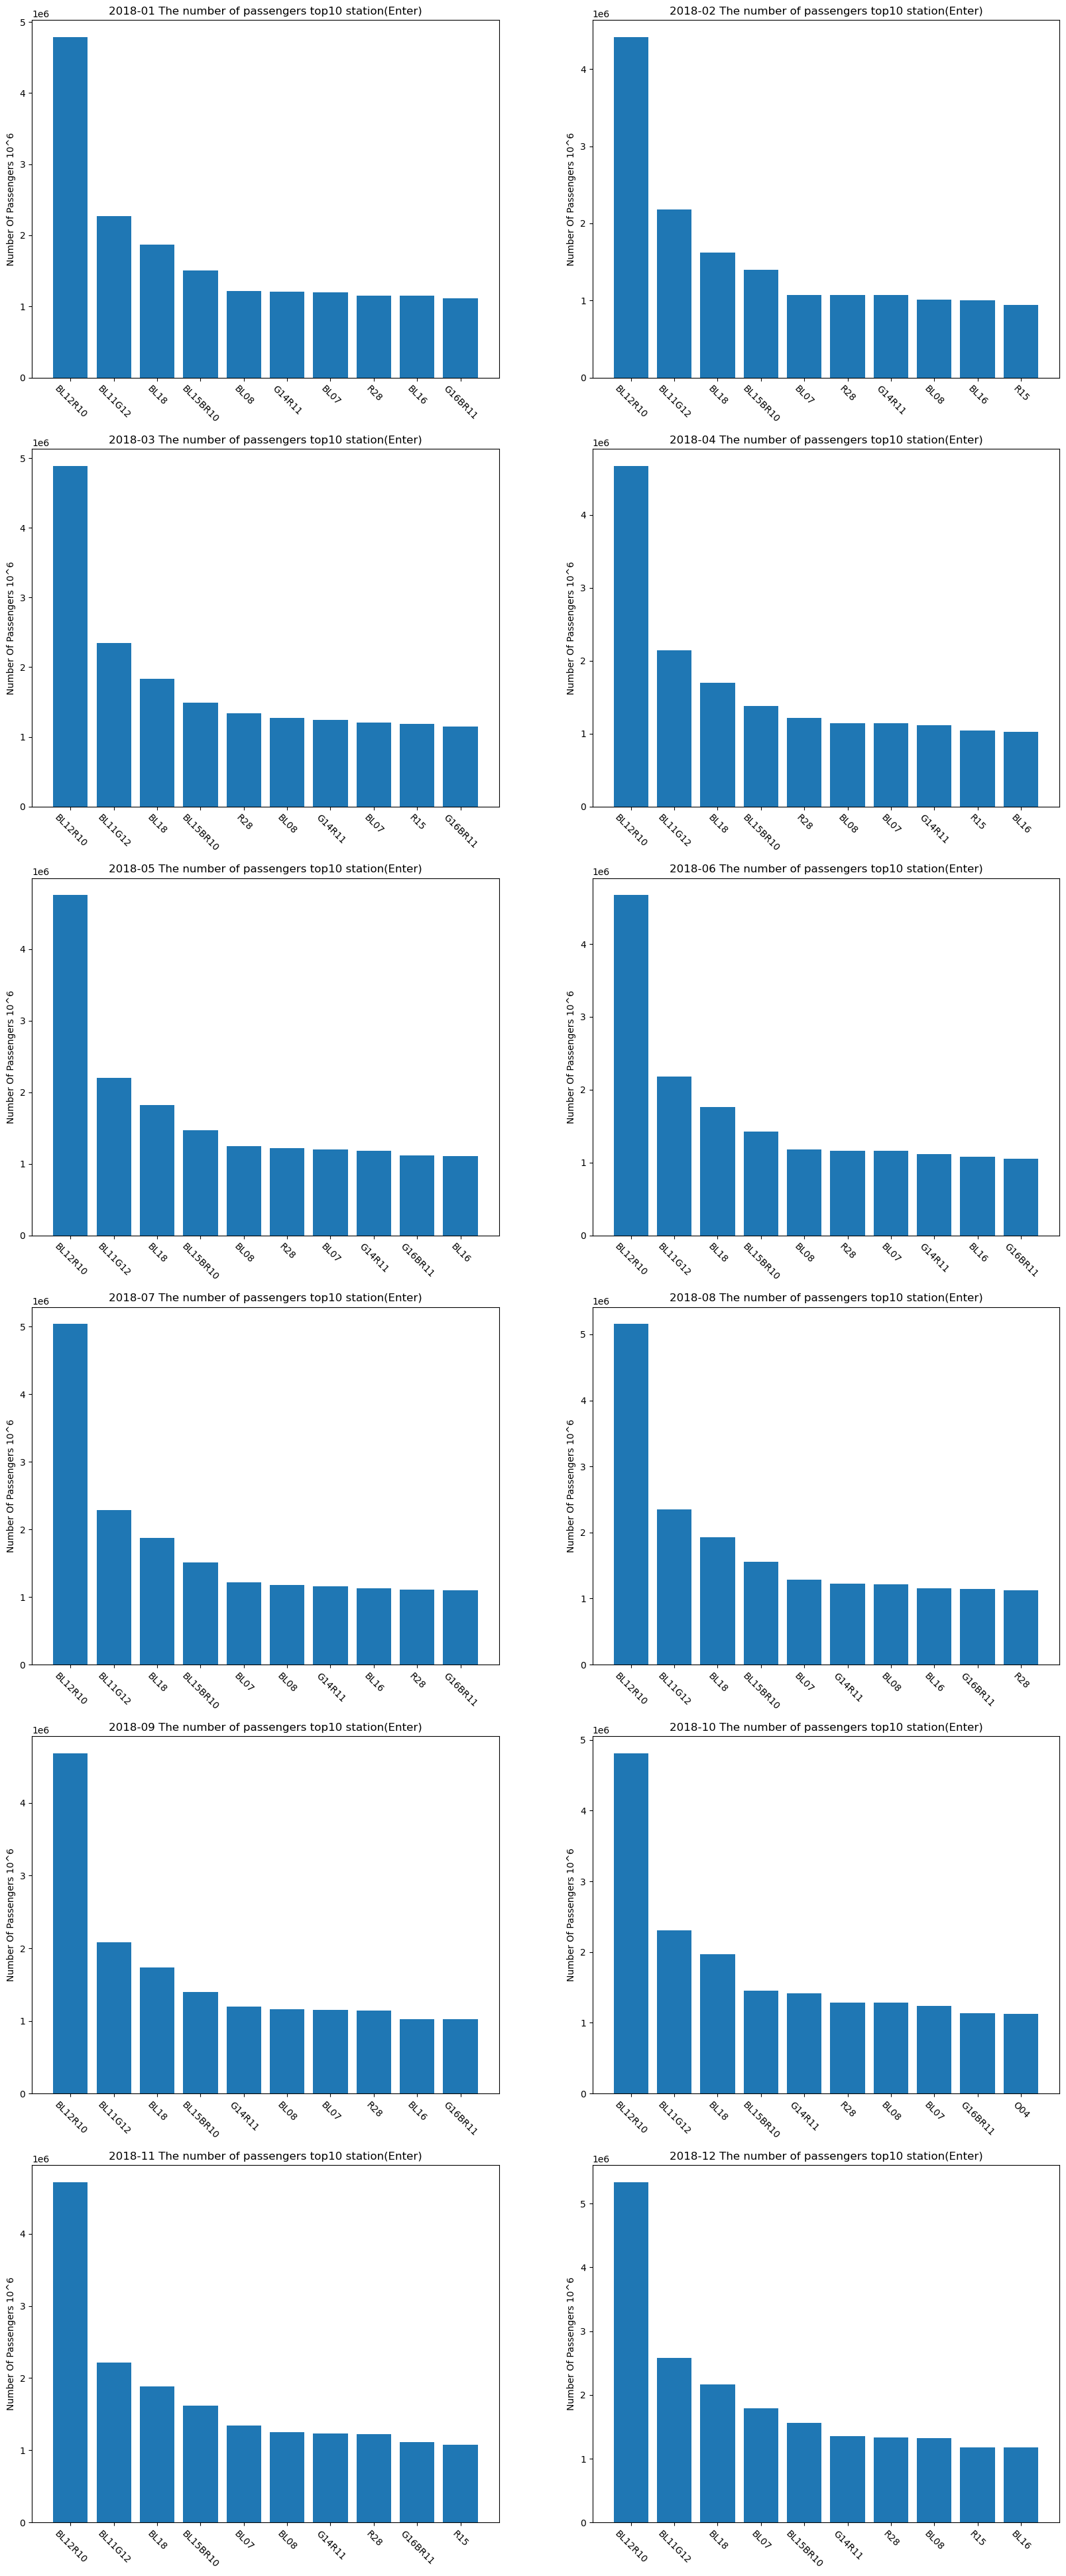

In [8]:
#plot the number of passengers top10 station(Enter) chart for 2018
figure,axes =plt.subplots(6,2,figsize=(20,50),dpi=100)
n=0
for i in df2018In:
    j = int(n/2)
    k = n%2
    axes[j][k].set_ylabel('Number Of Passengers 10^6')
    axes[j][k].set_title('2018-'+str(n+1).zfill(2)+' The number of passengers top10 station(Enter)')
    axes[j][k].bar(i.head(10).enter.map(StationDict),i.head(10).num)
    axes[j][k].set_xticklabels(i.head(10).enter.map(StationDict),rotation=-45)
    n+=1

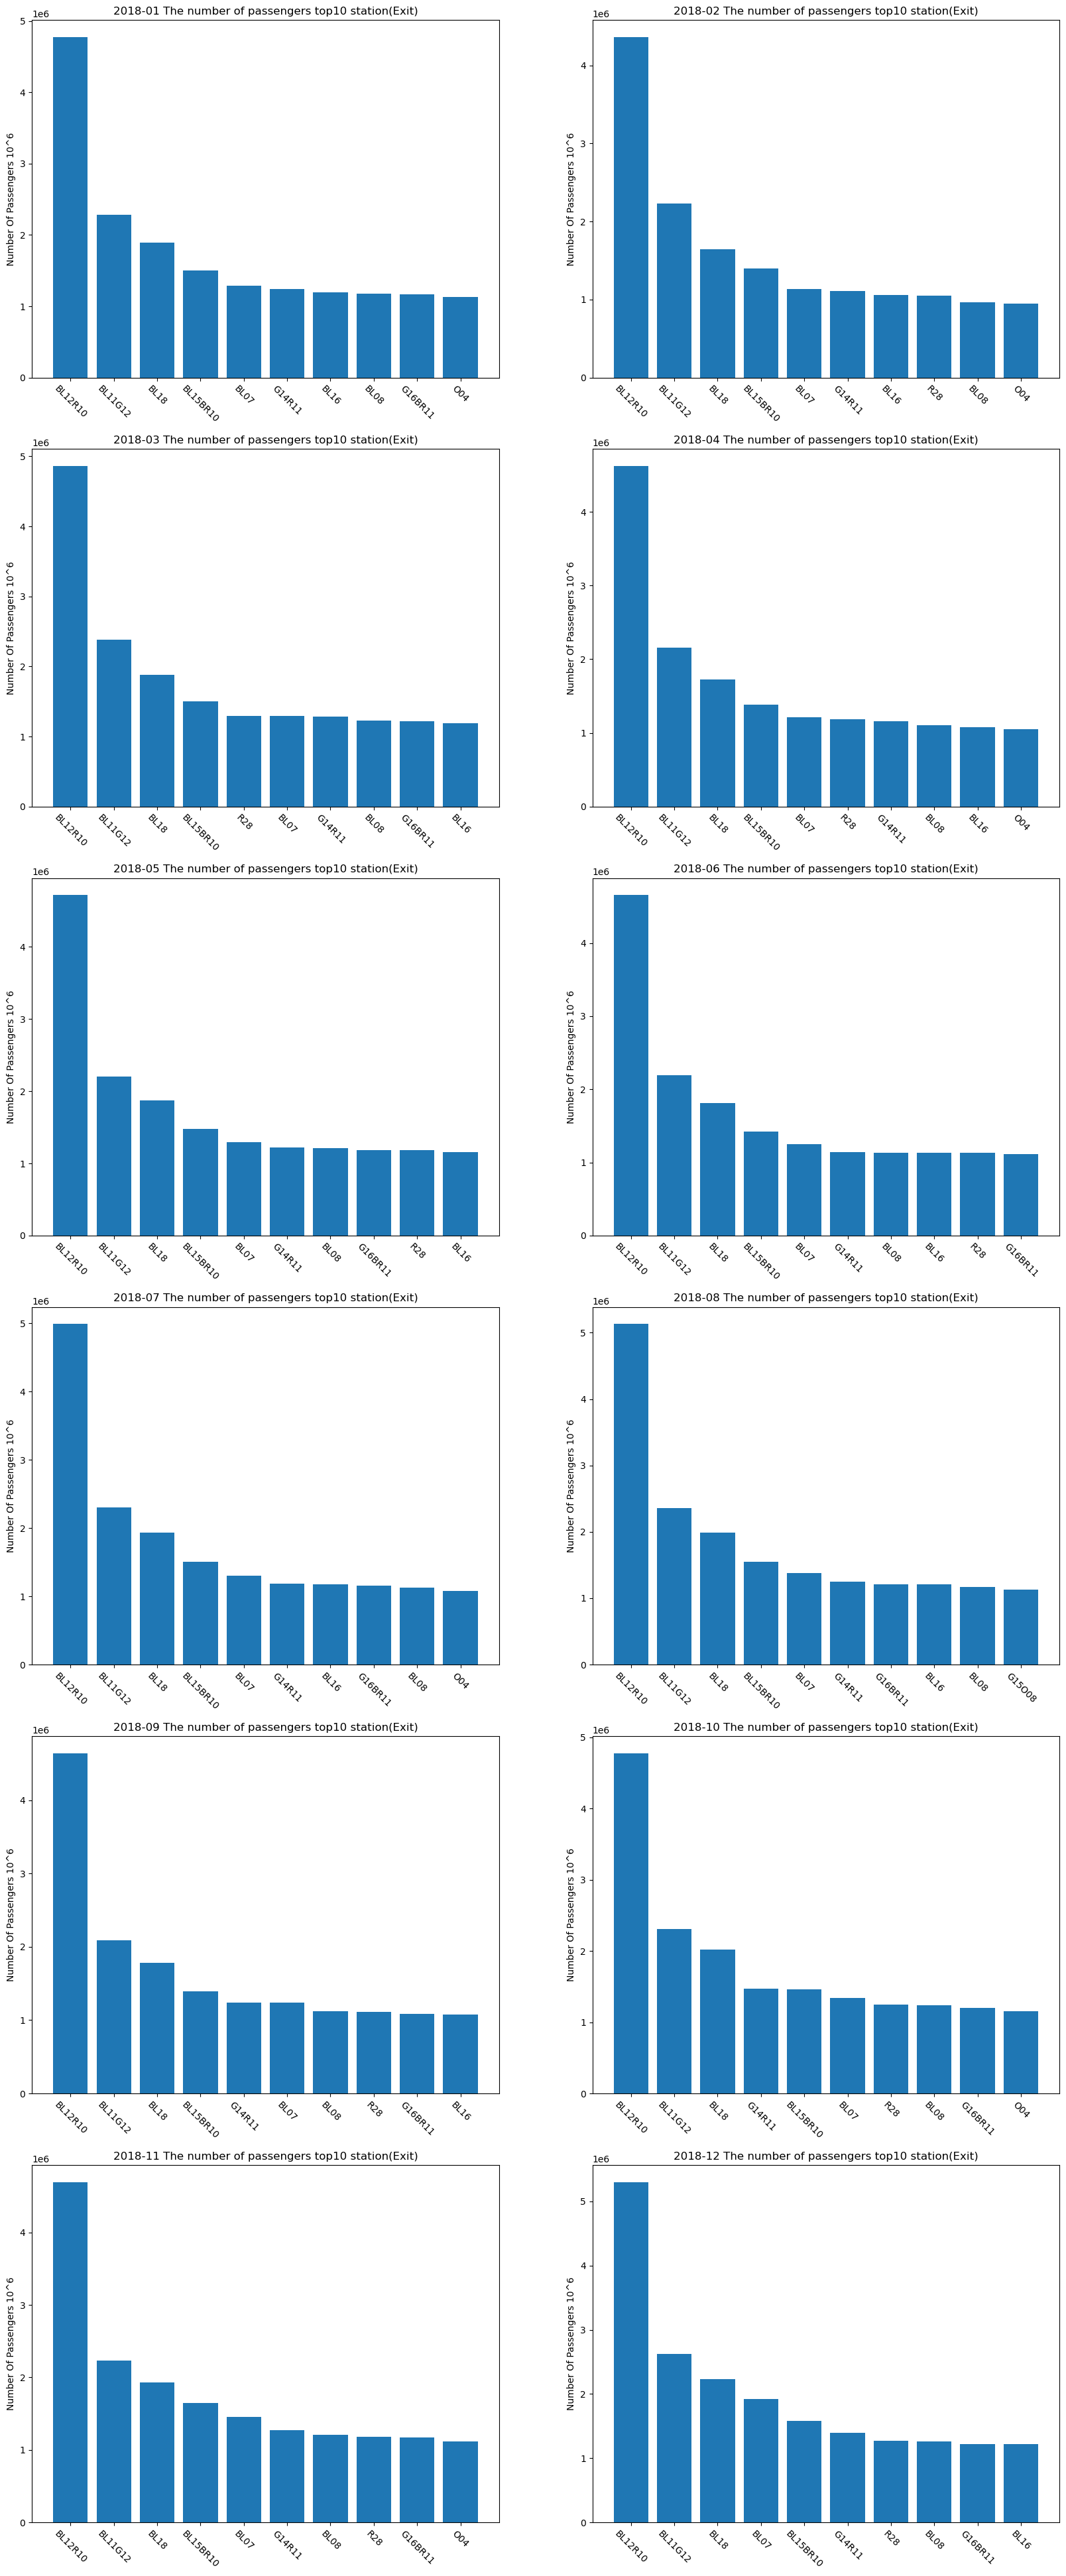

In [9]:
#plot the number of passengers top10 station(Exit) chart for 2018
figure,axes =plt.subplots(6,2,figsize=(20,50),dpi=100)
n=0
for i in df2018Out:
    j = int(n/2)
    k = n%2
    axes[j][k].set_ylabel('Number Of Passengers 10^6')
    axes[j][k].set_title('2018-'+str(n+1).zfill(2)+' The number of passengers top10 station(Exit)')
    axes[j][k].bar(i.head(10).exit.map(StationDict),i.head(10).num)
    axes[j][k].set_xticklabels(i.head(10).exit.map(StationDict),rotation=-45)
    n+=1